Exploratory data analysis is a crucial step in any data workflow. Create a Jupyter Notebook that explores your data mathematically and visually. Explore features, apply descriptive statistics, look at distributions, and determine how to handle sampling or any missing values.

Requirements:

1.Create an exploratory data analysis notebook. <br>2. Determine how to handle sampling or missing values.  <br>3. Perform statistical analysis, along with any visualizations. <br>4. Clearly identify shortcomings, assumptions, and next steps.

Submission:

Due Tuesday May 8.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix

ow = pd.read_csv('assets/overwatch-diary.csv', index_col = 0)


<center><b>Data Dictionary:</b> https://docs.google.com/document/d/1aYqMaddLpN0Skgwa17HRg-jwqOZ0NVLyWd1-zyTXGro/edit?usp=sharing</center><br><br>

## 1. EXPLORATORY DATA ANALYSIS

In [2]:
#Review columns
ow.head()

,result,game_id,sr_start,sr_finish,streak_number,my_team_sr,enemy_team_sr,map,round,capscore,...,character_2,character_3,psychological_condition,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
season,,,,,,,,,,,,,,,,,,,,,
4,W,NaN,NaN,NaN,1.0,2637.0,2613.0,Volskaya Industries,2.0,1.0,...,NaN,NaN,Good,10.0,1.0,5001.0,3252.0,1.0,33.0,6.0
4,W,NaN,NaN,NaN,2.0,2528.0,2515.0,Volskaya Industries,2.0,0.0,...,NaN,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,89.0,NaN,NaN,NaN,2755.0,2756.0,Volskaya Industries,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,W,65.0,NaN,NaN,1.0,2403.0,2397.0,Volskaya Industries,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W,3.0,NaN,NaN,3.0,NaN,NaN,Volskaya Industries,2.0,2.0,...,NaN,NaN,Good,13.0,4.0,8118.0,6217.0,3.0,38.0,2.0


In [3]:
#determine data types of each feature
ow.dtypes

result                      object
game_id                    float64
sr_start                   float64
sr_finish                  float64
streak_number              float64
my_team_sr                 float64
enemy_team_sr              float64
map                         object
round                      float64
capscore                   float64
score_distance             float64
team_role                   object
match_length               float64
charcter_1                  object
character_2                 object
character_3                 object
psychological_condition     object
eliminations               float64
objective_kills            float64
healing                    float64
deaths                     float64
weapon_accuracy            float64
offensive_assists          float64
defensive_assists          float64
dtype: object

In [4]:
#get general info of float features
ow.describe()

,game_id,sr_start,sr_finish,streak_number,my_team_sr,enemy_team_sr,round,capscore,score_distance,match_length,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
count,2541.000000,1601.000000,1601.000000,2239.000000,2976.000000,2969.000000,3126.000000,2910.000000,1346.000000,3072.000000,271.000000,271.000000,269.000000,269.000000,265.000000,149.000000,109.000000
mean,174.366391,2543.425984,2543.970019,2.037517,2649.310148,2649.226002,1.942418,1.511684,72.338536,6.847487,14.948339,7.933579,5852.706320,9825.516729,9.452830,33.966443,7.669725
std,137.568168,208.106868,208.001675,1.783257,232.276078,235.120862,1.008069,1.081280,119.640825,10.590117,10.412826,6.974771,4195.568791,4692.357682,5.582596,13.700176,9.068724
min,1.000000,1966.000000,1966.000000,0.000000,1956.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,66.000000,2421.000000,2421.000000,1.000000,2519.000000,2516.000000,1.000000,1.000000,60.470000,4.000000,7.000000,2.000000,2534.000000,6677.000000,6.000000,24.000000,4.000000
50%,145.000000,2568.000000,2568.000000,1.000000,2655.000000,2656.000000,2.000000,2.000000,71.750000,6.000000,14.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000
75%,223.000000,2678.000000,2680.000000,3.000000,2821.000000,2823.000000,2.000000,2.000000,82.545000,8.000000,21.000000,11.000000,8638.000000,12862.000000,12.000000,44.000000,9.000000
max,538.000000,3017.000000,3017.000000,13.000000,3178.000000,3172.000000,6.000000,4.000000,4375.000000,535.000000,46.000000,34.000000,19226.000000,23700.000000,59.000000,66.000000,80.000000


## 2. DETERMINE HOW TO HANDLE MISSING VALUES

In [5]:
# Review missing values in each column
count_nan = len(ow) - ow.count()
count_nan

result                        0
game_id                     720
sr_start                   1660
sr_finish                  1660
streak_number              1022
my_team_sr                  285
enemy_team_sr               292
map                           0
round                       135
capscore                    351
score_distance             1915
team_role                     6
match_length                189
charcter_1                   60
character_2                2755
character_3                3209
psychological_condition    1999
eliminations               2990
objective_kills            2990
healing                    2992
deaths                     2992
weapon_accuracy            2996
offensive_assists          3112
defensive_assists          3152
dtype: int64

In [6]:
ow.mean()

game_id               174.366391
sr_start             2543.425984
sr_finish            2543.970019
streak_number           2.037517
my_team_sr           2649.310148
enemy_team_sr        2649.226002
round                   1.942418
capscore                1.511684
score_distance         72.338536
match_length            6.847487
eliminations           14.948339
objective_kills         7.933579
healing              5852.706320
deaths               9825.516729
weapon_accuracy         9.452830
offensive_assists      33.966443
defensive_assists       7.669725
dtype: float64

In [7]:
#finding missing values of float features
ow.median()

game_id               145.00
sr_start             2568.00
sr_finish            2568.00
streak_number           1.00
my_team_sr           2655.00
enemy_team_sr        2656.00
round                   2.00
capscore                2.00
score_distance         71.75
match_length            6.00
eliminations           14.00
objective_kills         6.00
healing              5418.00
deaths               9460.00
weapon_accuracy         9.00
offensive_assists      28.00
defensive_assists       6.00
dtype: float64

In [8]:
#the significant missing values are mostly from float features, so let's fill nulls with the feature median
ow = ow.fillna(ow.median())

In [9]:
#confirming that null values are now filled w median
ow.describe()

,game_id,sr_start,sr_finish,streak_number,my_team_sr,enemy_team_sr,round,capscore,score_distance,match_length,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
count,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000
mean,167.882551,2555.935296,2556.202392,1.712358,2649.807421,2649.832567,1.944802,1.564244,71.992922,6.798369,14.078810,6.160687,5453.858939,9490.151487,9.036799,28.272616,6.055811
std,122.039577,146.310141,146.214103,1.553957,221.896555,224.352265,0.987042,1.032566,76.848400,10.280459,3.008105,2.077029,1208.886998,1349.148513,1.593467,3.173928,1.677699
min,1.000000,1966.000000,1966.000000,0.000000,1956.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,88.000000,2568.000000,2568.000000,1.000000,2531.000000,2529.000000,1.000000,1.000000,71.750000,4.000000,14.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000
50%,145.000000,2568.000000,2568.000000,1.000000,2655.000000,2656.000000,2.000000,2.000000,71.750000,6.000000,14.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000
75%,199.000000,2568.000000,2568.000000,2.000000,2809.000000,2807.000000,2.000000,2.000000,71.750000,8.000000,14.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000
max,538.000000,3017.000000,3017.000000,13.000000,3178.000000,3172.000000,6.000000,4.000000,4375.000000,535.000000,46.000000,34.000000,19226.000000,23700.000000,59.000000,66.000000,80.000000


In [10]:
#create dummy variable for each object features
#result_dummy = pd.get_dummies(ow['result'])
result_dummy = pd.get_dummies(ow['result'])
map_dummy = pd.get_dummies(ow['map'])
role_dummy = pd.get_dummies(ow['team_role'])
hero1_dummy = pd.get_dummies(ow['charcter_1'])
hero2_dummy = pd.get_dummies(ow['character_2'])
hero3_dummy = pd.get_dummies(ow['character_3'])

In [11]:
#concetenate dummies into ow
ow = pd.concat([ow, result_dummy, map_dummy, role_dummy, hero1_dummy, hero2_dummy, hero3_dummy], axis = 1)
ow.head()

,result,game_id,sr_start,sr_finish,streak_number,my_team_sr,enemy_team_sr,map,round,capscore,...,lucio,mercy,Ana,Lucio,Mercy,Soldier,Symmetra,Zarya,Zenyatta,lucio
season,,,,,,,,,,,,,,,,,,,,,
4,W,145.0,2568.0,2568.0,1.0,2637.0,2613.0,Volskaya Industries,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,W,145.0,2568.0,2568.0,2.0,2528.0,2515.0,Volskaya Industries,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,W,89.0,2568.0,2568.0,1.0,2755.0,2756.0,Volskaya Industries,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,W,65.0,2568.0,2568.0,1.0,2403.0,2397.0,Volskaya Industries,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,W,3.0,2568.0,2568.0,3.0,2655.0,2656.0,Volskaya Industries,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0


## 3. PERFORM STATISTICAL ANALYSIS ALONG WITH ANY VISUALIZATIONS


<IPython.core.display.Javascript object>


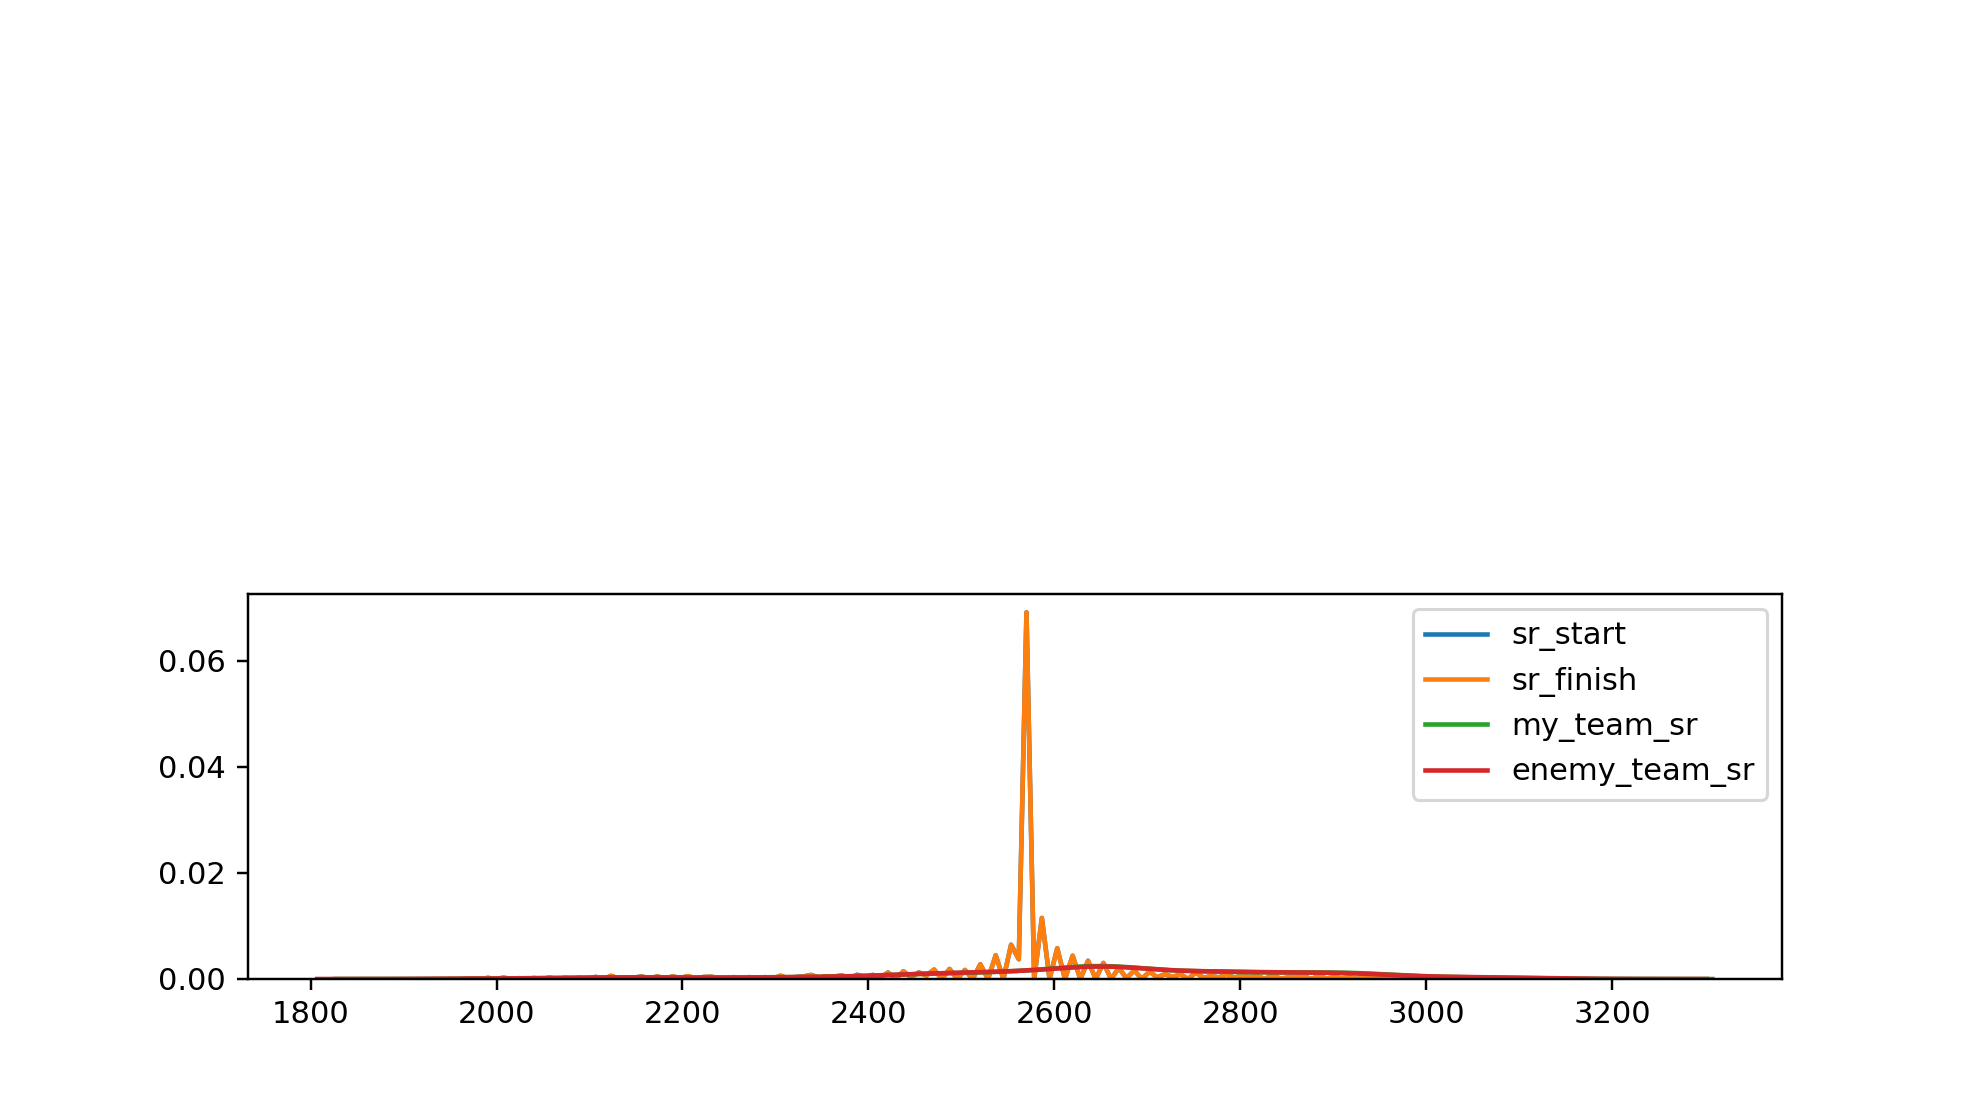

In [15]:

plt.figure(figsize = (9, 5))


plt.subplot(212)
sns.kdeplot(ow['sr_start'])
plt.subplot(212)
sns.kdeplot(ow['sr_finish'])
plt.subplot(212)
sns.kdeplot(ow['my_team_sr'])
plt.subplot(212)
sns.kdeplot(ow['enemy_team_sr'])

## SHORTCOMINGS, ASSUMPTIONS, NEXT-STEPS
## SHORTCOMINGS
- Need to figure out how to approach how to fill in nulls. For example, team_role has some empty values
- There is quite a bit data missing from some of the float features. It is worth considering whether it is enough instances to accurately predict result

## ASSUMPTIONS
- We are assuming that there are enough games played to accurately predict whether we will win or lose


## NEXT-STEPS
- Create alternate ways to determine how second and third heroes were picked
- Figure out how to fill nulls on Object values
- Create features that could be interesting (example: change in sr before and after match)